In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
#define a function to find the roots of
def function_for_roots(x):
    a=1.01
    b=-3.04
    c=2.07
    return a*x**2+b*x+c

In [3]:
#validate our initial bracket
def check_initial_value(f,m_min,x_max,tol):
    
    #check initial guess
    y_min=f(x_min)
    y_max=f(x_max)
    
    #check that xmin and xmax bracket a root (multiply to (-))
    if(y_min*y_max>0.0):
        print("No zero crossing found in the range ",x_min,"to ",x_max)
        s="f(%f)=%f,f(%f=%f)" % (x_min,y_min,x_max,y_max)
        print(s)
        return 0
    
    #if xmin is a root, then return flag==1
    if(np.fabs(y_min)<tol):
        return 1
    #if xmax is a root, then return flag==2
    if(np.fabs(y_max)<tol):
        return 2
    #if we reach this point, the bracket is valid
    return 3

In [8]:
def bisection_root_finding(f,x_min_start,x_max_start,tol):
    #this fucntion uses bisection search to find a root of f
    x_min=x_min_start
    x_max=x_max_start
    x_mid=0.0
    
    y_min=f(x_min)
    y_max=f(x_max)
    y_mid=0.0
    
    max_iters=10000
    i=0
    
    #check the initial values
    flag=check_initial_value(f,x_min,x_max,tol)
    
    if(flag==0):
        print("Error in bisection_root_finding")
        raise ValueError("Initial values invalid ",x_min,m_max)
    elif(flag==1):
        #we got lucky
        return x_min
    elif(flag==2):
        return x_max
    #if we reach here, then conduct the search 
    #set a flag
    while(flag):
        #set our point
        x_mid=0.5*(x_min+x_max)
        y_mid=f(x_mid)
        
        #check if x_mid is a root
        if(np.fabs(y_mid)<tol):
            flag=0
            print("Number of iterations = ",i)
        else:
            #x_mid is not a root
            #if the product of the function at the midpoint and at one of the 
            #end points is greater than 0, replace this endpoint
            if(f(x_min)*f(x_mid)>0):
                #replace x_min with x_mid
                x_min=x_mid
            else:
                #replace x_max with x_mid
                x_max=x_mid
        #print out the iteration
        print(x_min,f(x_min),x_max,f(x_max))

        #count the iteration
        i+=1

        #if we have surpassed max_iters, exit
        if(i>=max_iters):
            print("Exceeded max number of iterations ",i)
            s="Min bracket f(%f) = %f" % (x_min,f(x_min))
            print(s)
            s="Max bracket f(%f) = %f" % (x_max,f(x_max))
            print(s)
            s="Mid bracket f(%f) = %f" % (x_mid,f(x_mid))
            print(s)
            raise StopIteration('Stopping iterations after ', i," iterations")

    return x_mid

In [10]:
x_min=0.0
x_max=1.5
tolerance=1.0e-6

print(x_min,function_for_roots(x_min))
print(x_max,function_for_roots(x_max))

x_root = bisection_root_finding(function_for_roots,x_min,x_max,tolerance)
y_root = function_for_roots(x_root)

s="Root found within y(%f) = %f" % (x_root,y_root)
print(s)

0.0 2.07
1.5 -0.2175000000000007
0.75 0.3581249999999996 1.5 -0.2175000000000007
0.75 0.3581249999999996 1.125 -0.07171875000000005
0.9375 0.10769531249999975 1.125 -0.07171875000000005
1.03125 0.009111328124999485 1.125 -0.07171875000000005
1.03125 0.009111328124999485 1.078125 -0.033522949218749876
1.03125 0.009111328124999485 1.0546875 -0.012760620117187482
1.03125 0.009111328124999485 1.04296875 -0.0019633483886720704
1.037109375 0.0035393142700193003 1.04296875 -0.0019633483886720704
1.0400390625 0.0007793140411376243 1.04296875 -0.0019633483886720704
1.0400390625 0.0007793140411376243 1.04150390625 -0.0005941843986509987
1.040771484375 9.202301502186927e-05 1.04150390625 -0.0005941843986509987
1.040771484375 9.202301502186927e-05 1.0411376953125 -0.0002512161433698701
1.040771484375 9.202301502186927e-05 1.04095458984375 -7.963042706249368e-05
1.040863037109375 6.1878282573424315e-06 1.04095458984375 -7.963042706249368e-05
1.040863037109375 6.1878282573424315e-06 1.04090881347656

(-0.5, 2.1)

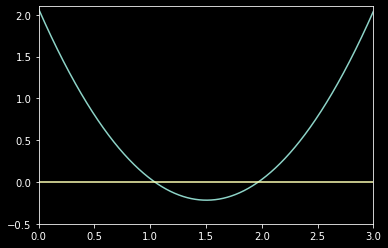

In [35]:
x = np.linspace(0, 3, 1000)
y = function_for_roots(x)
plt.plot(x,y)

z=np.zeros(1000)
plt.plot(x,z)

plt.plot(x_root, y_root)

plt.plot(x_min, function_for_roots(x_min))
plt.plot(x_max, function_for_roots(x_max))

plt.xlim([0,3])
plt.ylim([-0.5,2.1])